Case study on Credit Risk

Context:
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Objective:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

Variable Description

Loan_ID Unique Loan ID

Gender Male/ Female

Married Applicant married (Y/N)

Dependents Number of dependents

Education Applicant Education (Graduate/ Under Graduate)

Self_Employed Self employed (Y/N)

ApplicantIncome Applicant income

CoapplicantIncome Coapplicant income

LoanAmount Loan amount in thousands

Loan_Amount_Term Term of loan in months

Credit_History credit history meets guidelines

Property_Area Urban/ Semi Urban/ Rural

Loan_Status Loan approved (Y/N)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from scipy import stats
from sklearn import metrics
import os,sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("/content/CreditRisk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
df.shape

(614, 13)

In [4]:
df1=df.drop("Loan_ID",axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
df1.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(array([  1.,   0.,   2.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,
          0.,   0.,   0.,   0., 512.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12.  ,  21.36,  30.72,  40.08,  49.44,  58.8 ,  68.16,  77.52,
         86.88,  96.24, 105.6 , 114.96, 124.32, 133.68, 143.04, 152.4 ,
        161.76, 171.12, 180.48, 189.84, 199.2 , 208.56, 217.92, 227.28,
        236.64, 246.  , 255.36, 264.72, 274.08, 283.44, 292.8 , 302.16,
        311.52, 320.88, 330.24, 339.6 , 348.96, 358.32, 367.68, 377.04,
        386.4 , 395.76, 405.12, 414.48, 423.84, 433.2 , 442.56, 451.92,
        461.28, 470.64, 480.  ]),
 <BarContainer object of 50 artists>)

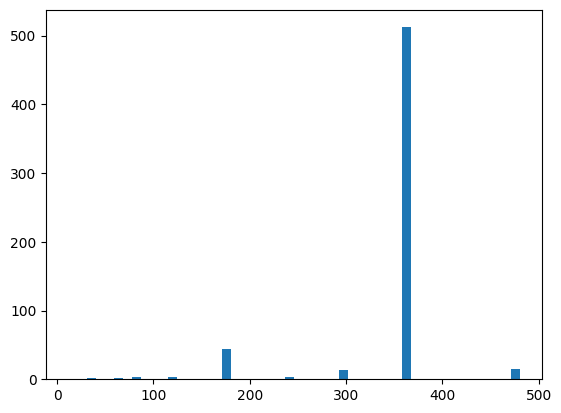

In [6]:
df1['Loan_Amount_Term'].value_counts(normalize=True)
plt.hist(df1["Loan_Amount_Term"],50)

Text(0.5, 1.0, 'Plot of loan amount')

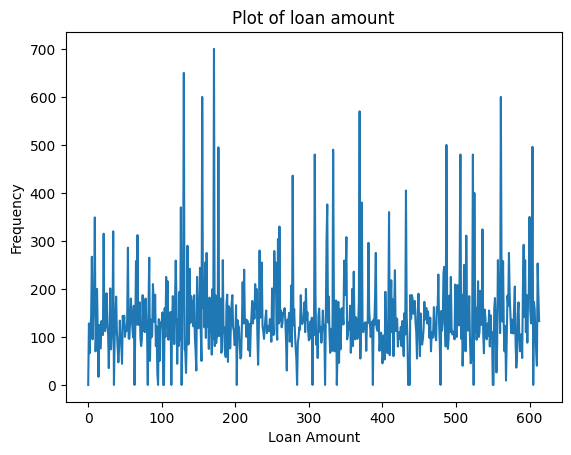

In [7]:
plt.plot(df1.LoanAmount)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Plot of loan amount")

In [8]:
df1.drop(["Loan_Amount_Term"],axis=1,inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1


Missing value treatment is done next and each variables missing value is replaced with 0.
compare the results after replacing missing with median

In [9]:
df1=df1.fillna("0")
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


In [10]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7d9a436b0fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9a436b14e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9a436b0d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9a436b1a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9a436b1cf0>],
 'means': []}

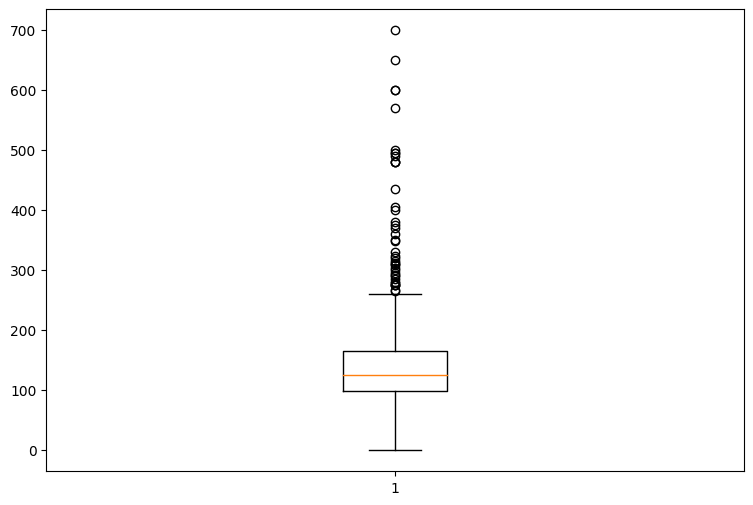

In [11]:
fig=plt.figure(1,figsize=(9,6))
ax=fig.add_subplot(111)
ax.boxplot(df1["LoanAmount"])

<Axes: >

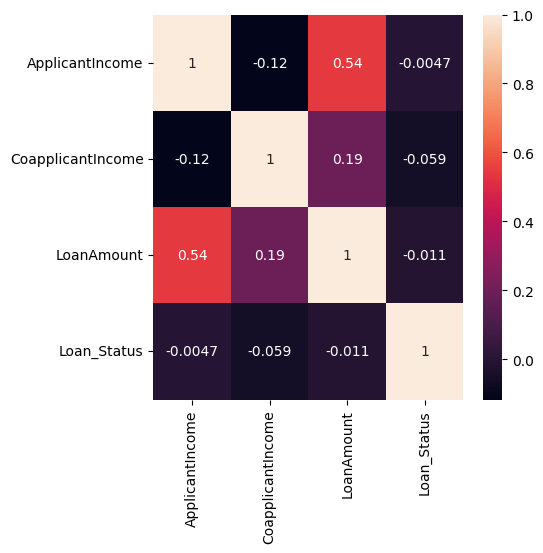

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(df1.corr(),annot=True)

In [13]:
df1.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5446.078125,1877.807292,142.557292
1,5384.068720,1504.516398,140.533175


Now we will convert x and y variable to categorical

In [14]:
df1['Loan_Status']=df['Loan_Status'].astype("category")
df1['Credit_History']=df1["Credit_History"].astype("category")

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         614 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.7+ KB


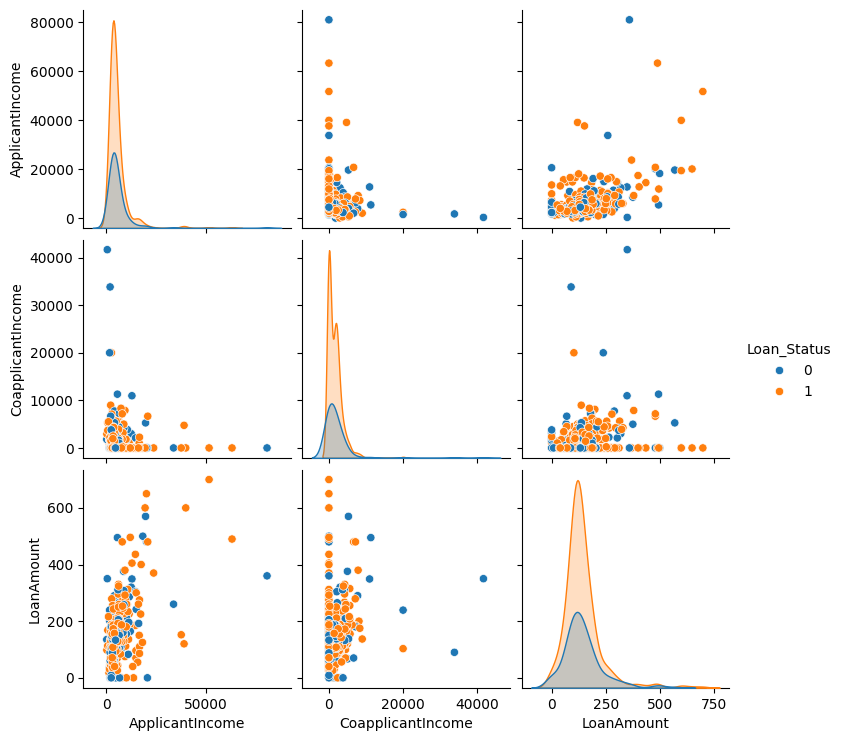

In [16]:
sns.pairplot(df1,hue="Loan_Status")

Check how the data is balanced

In [17]:
prop_y=df['Loan_Status'].value_counts(normalize=True)
prop_y

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

There seems to be imbalance in the dataset an one class is 31.27% and other class is 68.72%

We will define x and y variable now

In [18]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

using one-hot coding we will convert categorical into numeric variables

In [19]:
x=pd.get_dummies(x,drop_first=True)

Using Train test split

In [20]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30)

Built the actual logistic reg model

In [21]:
import statsmodels.api as sm
logit=sm.Logit(y_train,sm.add_constant(x_train))
lg=logit.fit()

Optimization terminated successfully.
         Current function value: 0.444023
         Iterations 30


We will now check the summary of the model

In [22]:
from scipy import stats
stats.chisqprob=lambda chisq,df:stats.chi2.sf(chisq,df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                           17
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                  0.2666
Time:                        20:29:55   Log-Likelihood:                -190.49
converged:                       True   LL-Null:                       -259.73
Covariance Type:            nonrobust   LLR p-value:                 4.279e-21
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     140.8854        nan        nan        nan         nan         nan
ApplicantIncome         -1.839e-05   2.74e-05     -0.672      0.501    -7.2e-05    3.52e-05


The pseudo r-sq shows only 30.41% of entire variation in the data is explained by the model.It is really not a good model

In the next step we will calculate the odds ratio.

In [23]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
log_coef = pd.DataFrame(lg.params, columns=['coef'])
log_coef.loc[:, "Odds_ratio"] = np.exp(log_coef.coef)
log_coef['probability'] = log_coef['Odds_ratio']/(1+log_coef['Odds_ratio'])
log_coef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [24]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
log_coef = log_coef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = log_coef['pval']<=0.1
log_coef[pval_filter]

,coef,Odds_ratio,probability,pval
Credit_History_0,4.12,61.61,0.98,0.00
Credit_History_1.0,3.78,43.89,0.98,0.00
Property_Area_Semiurban,1.11,3.03,0.75,0.00


In [25]:
#Predict for test data
#We will use the sklearn library to build the model and make predictions

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

We will use the sklearn library to build the model and make predictions

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
pred_train=log_reg.predict(x_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train=confusion_matrix(y_train,pred_train)

print("confusion_matrix= \n",mat_train)

confusion_matrix= 
 [[ 40  86]
 [ 23 280]]


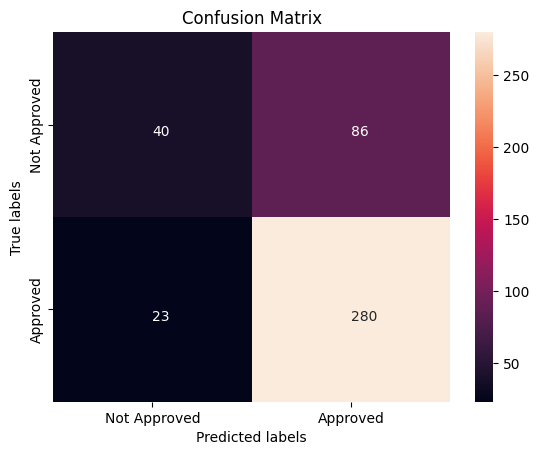

In [28]:
ax= plt.subplot()
ax.set_ylim(2.0, 0)
annot_kws = {"ha": 'left',"va": 'top'}

sns.heatmap(mat_train, annot=True, ax = ax, fmt= 'g',annot_kws=annot_kws); #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']);
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']);

In [29]:
#Predict for test set
pred_test = log_reg.predict(x_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[ 29  37]
 [ 10 109]]


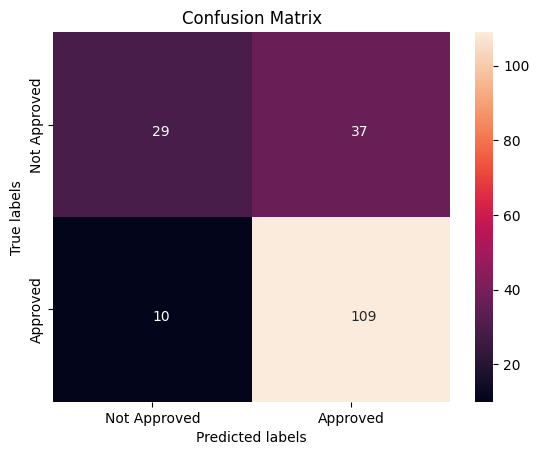

In [30]:
ax= plt.subplot()
ax.set_ylim(2.0, 0)
annot_kws = {"ha": 'left',"va": 'top'}

sns.heatmap(mat_test, annot=True, ax = ax, fmt= 'g',annot_kws=annot_kws); #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']);
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']);

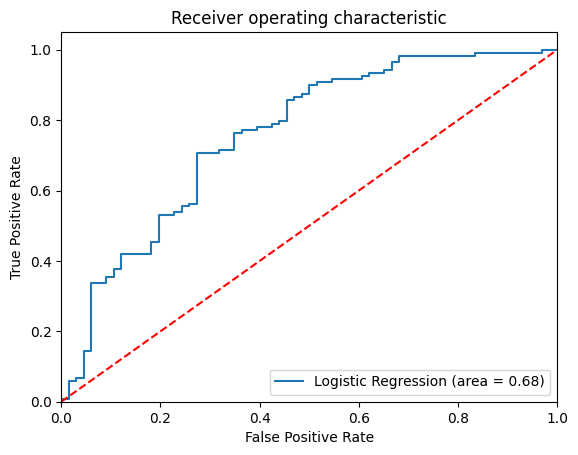

In [31]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
auc_score = metrics.roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.76

In [33]:
score = log_reg.score(x_train, y_train)
print(score)

0.745920745920746


In [34]:
score = log_reg.score(x_test, y_test)
print(score)

0.745945945945946
